In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [7]:
wine = pd.read_csv(r'C:\Users\hp\winequality-red.csv')

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Let's do some plotting to know how the data columns are distributed in the dataset

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

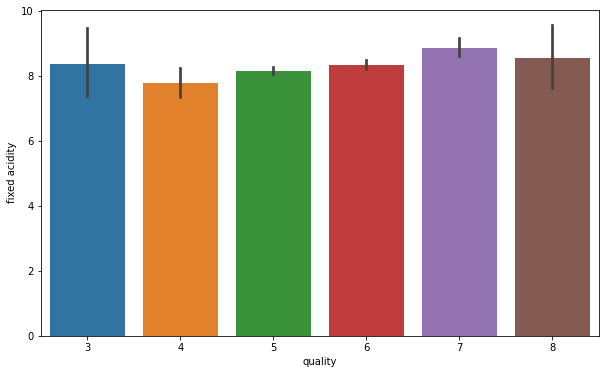

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

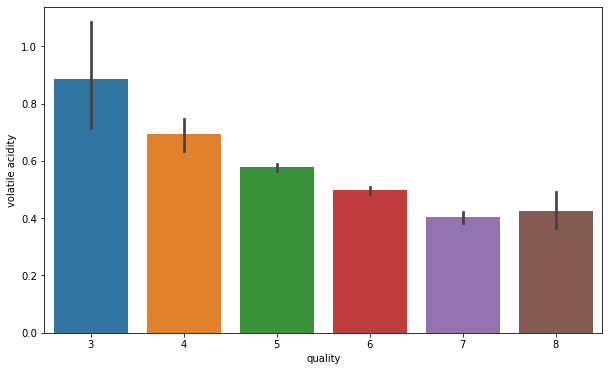

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

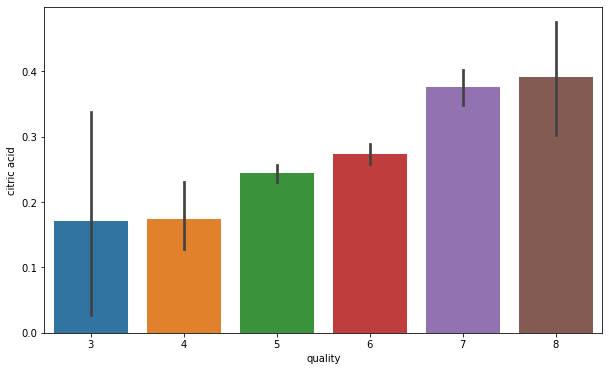

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

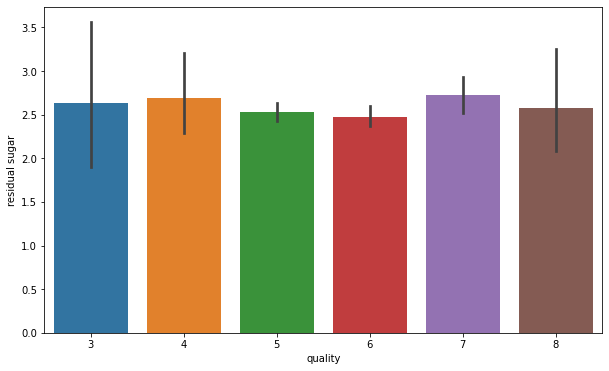

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

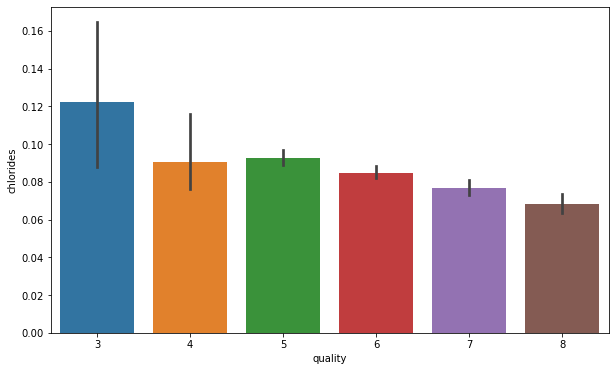

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

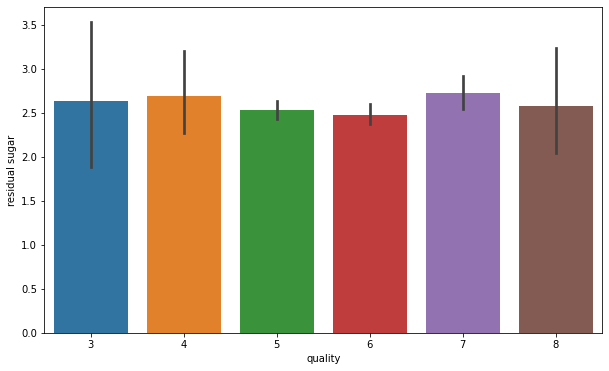

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

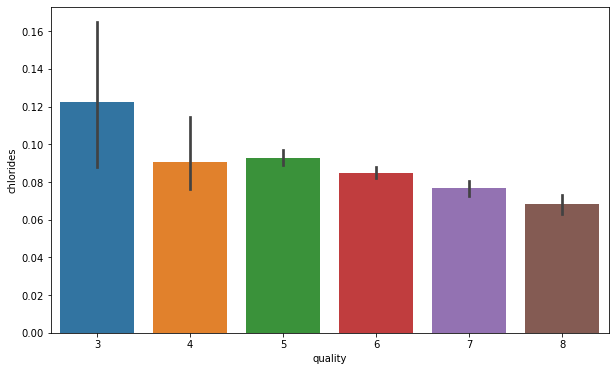

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

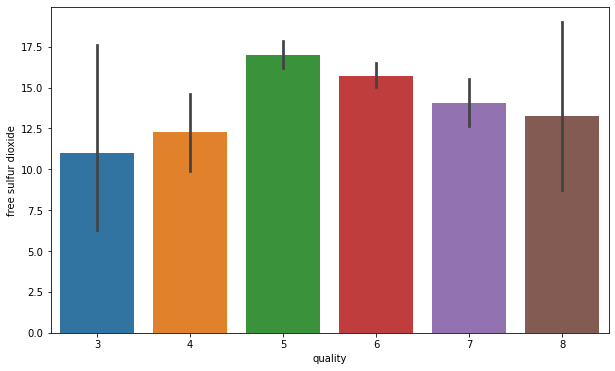

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

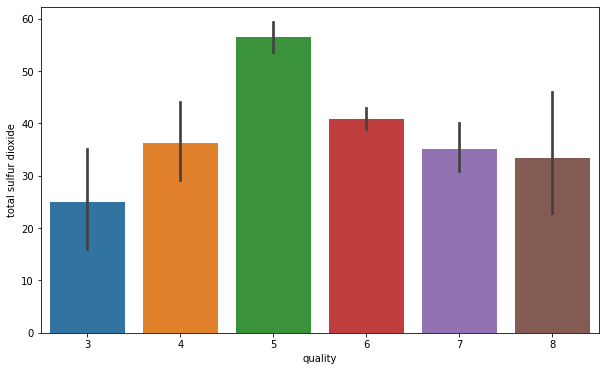

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

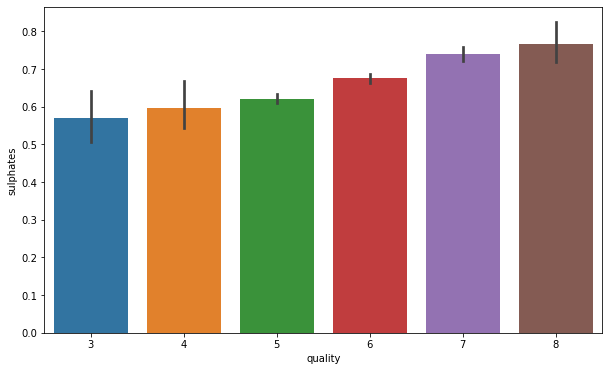

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

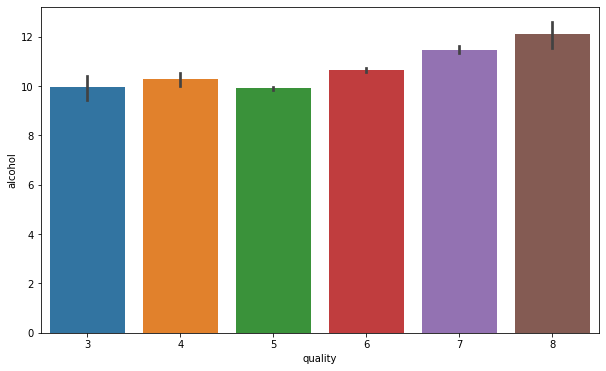

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# Preprocessing Data for performing Machine learning algorithms

In [21]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [22]:
label_quality = LabelEncoder()

In [23]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [24]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

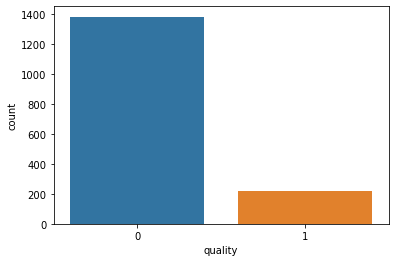

In [25]:
sns.countplot(wine['quality'])

In [29]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

NameError: name 'Sc' is not defined

# Random Forest Classifier

In [36]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [37]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.53      0.60        47

    accuracy                           0.90       320
   macro avg       0.81      0.75      0.77       320
weighted avg       0.89      0.90      0.89       320



Random forest gives the accuracy of 87%

In [39]:
print(confusion_matrix(y_test, pred_rfc))

[[262  11]
 [ 22  25]]


Stochastic Gradient Decent Classifier

In [40]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [41]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83       273
           1       0.35      0.87      0.50        47

    accuracy                           0.75       320
   macro avg       0.66      0.80      0.67       320
weighted avg       0.88      0.75      0.78       320



84% accuracy using stochastic gradient descent classifier

In [42]:
print(confusion_matrix(y_test, pred_sgd))

[[198  75]
 [  6  41]]


Support Vector Classifier

In [43]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [44]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



Grid Search CV

In [ ]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))